In [243]:
import sklearn.cluster as sk
from WWDK_Package import Data as d
from WWDK_Package import Cluster as cl
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import time

def time_k_plot(data, iterations, runs):
    liste = [0]
    sklearn_liste = [0]
    #inet_liste = []
    for i in range(iterations):
        meantime = []
        sk_meantime = []
        for j in range(runs):
            
            
            start = time.time()
            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            '''
            inet_meantime =[]
            start = time.time()
            k_means(data,i+1,300)
            end = time.time()
            inet_meantime.append(end-start)
            '''
            start = time.time()
            lib = sk.KMeans(init="random", n_init=10, tol= 1, n_clusters=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
            
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
        #inet_liste.append(np.mean(inet_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste, label='Ours')
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r", label='sk')
    plt.plot(sklearn_liste, "kx")
    #plt.plot(inet_liste, "g")
    #plt.plot(inet_liste, "kx")
    plt.xlabel("k")
    plt.ylabel("time[s]")
    plt.legend()
    return plt.show()

def inertia_k_plot(data, iterations, runs):
    inertia = [0]
    sklearn_inertia = [0]
    #inet_liste = []
    for i in range(iterations):
        meaninertia = []
        sk_meaninertia = []
        for j in range(runs):

            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            meaninertia.append(lib.inertia_)
            
            lib = sk.KMeans(init="random", n_init=10, tol= 1, n_clusters=i+1)
            lib.fit(data)
            sk_meaninertia.append(lib.inertia_)

        inertia.append(np.mean(meaninertia))
        sklearn_inertia.append(np.mean(sk_meaninertia))
        #inet_liste.append(np.mean(inet_meantime)
        
    plt.plot(inertia, label='Ours')
    plt.plot(inertia, "kx")
    plt.plot(sklearn_inertia, "r", label='sk')
    plt.plot(sklearn_inertia, "kx")
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.legend()
    return plt.show()

def time_init_plot(data, iterations, runs):
    liste = [0]
    sklearn_liste = [0]
    
    for i in range(iterations):
        meantime =[]
        sk_meantime = []
        for j in range(runs):
            
            
            start = time.time()
            lib = cl.Kmeans(inits=i+1, method="rng", k=8,tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            
            start = time.time()
            lib = sk.KMeans(init="random",n_clusters=8, n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste, label='Ours')
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r", label='sk')
    plt.plot(sklearn_liste, "kx")
    plt.xlabel("inits")
    plt.ylabel("time[s]")
    plt.legend()
    return plt.show()

def elbow_plot(data, max_k):
    Sum_of_squared_distances = []
    for i in range(max_k):
        km = cl.Kmeans(inits=10, method="rng", k=i+1)
        km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(Sum_of_squared_distances, "kx")
    plt.plot(Sum_of_squared_distances)
    plt.xlabel("k")
    plt.ylabel("Sum of squared distances")
    return plt.show()

def plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(data._k):
        graph = pd.DataFrame(data._data[np.argwhere(data.labels_ == i)].squeeze())
        center = pd.DataFrame(data.cluster_centers_[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    return plt.show()

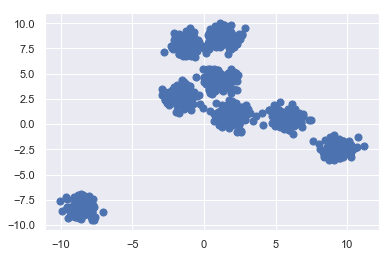

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

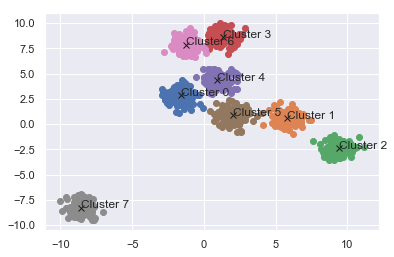

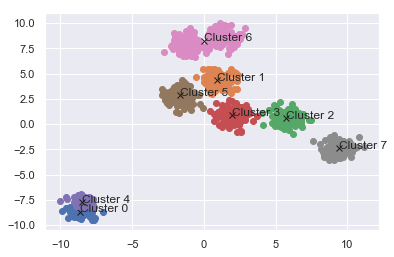

In [241]:
def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )   
    plt.show

me = cl.Kmeans(inits=10, method="rng", k=8, tol= 1)
me.fit(X)
sk = sk.KMeans(n_init=10, init="random", n_clusters=8, tol= 1)
sk.fit(X)

plot(X,me.labels_, me.cluster_centers_, 8)
plot(X,sk.labels_, sk.cluster_centers_, 8)

C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, r

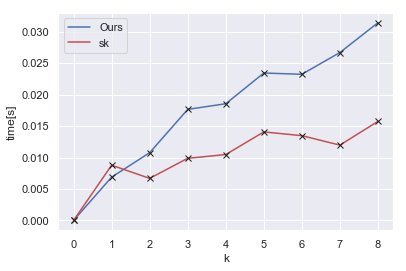

In [244]:
time_k_plot(X, iterations=8, runs=10)

C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, r

C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, r

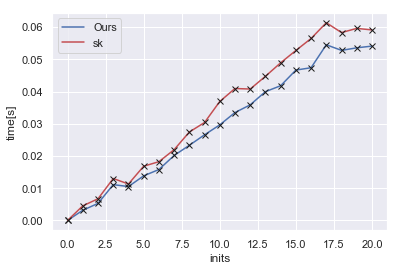

In [245]:
time_init_plot(X, iterations=20, runs=30)

C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, r

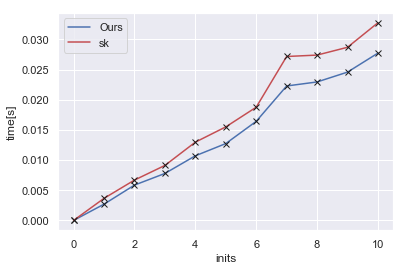

In [246]:
time_init_plot(X, iterations=10, runs=30)

C:\Users\Thorged\Desktop\k-means\WWDK_Package\Cluster.py:80: RuntimeWarning: Mean of empty slice.
  if np.any(np.isnan(self._data[position].mean(axis=0)) == True):
C:\Users\Thorged\Miniconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


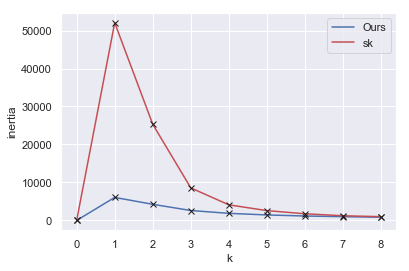

In [233]:
inertia_k_plot(X, iterations=8, runs=10)

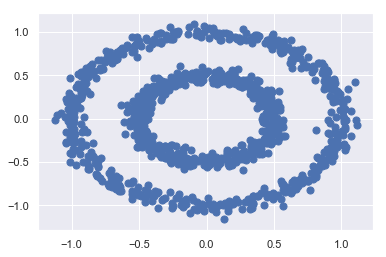

In [247]:

from sklearn import datasets
my_tuple = X, y_true = datasets.make_circles(n_samples=1000, factor=.5,
                                      noise=.05)
plt.scatter(X[:, 0], X[:, 1], s=50);

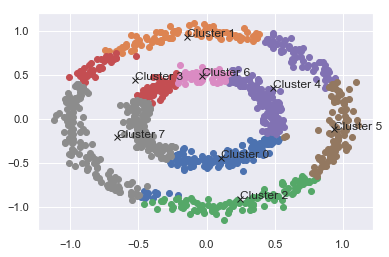

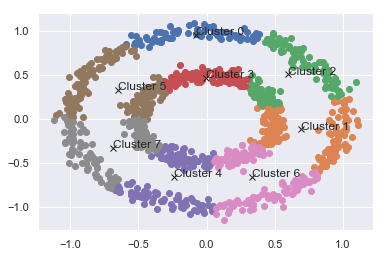

In [252]:
import sklearn.cluster as sk
from WWDK_Package import Data as d
from WWDK_Package import Cluster as cl

def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )   
    plt.show
    
me = cl.Kmeans(inits=10, method="rng", k=8, tol= 1)
me.fit(X)
sk = sk.KMeans(n_init=10, init="random", n_clusters=8, tol= 1)
sk.fit(X)

plot(X,me.labels_, me.cluster_centers_, 8)
plot(X,sk.labels_, sk.cluster_centers_, 8)

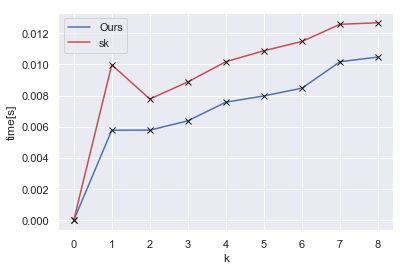

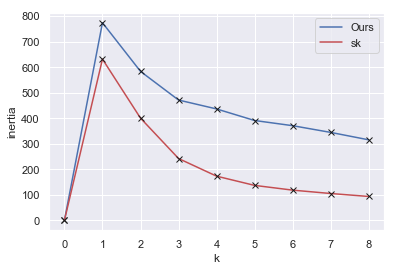

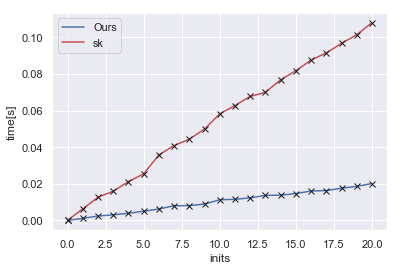

In [256]:
time_k_plot(X, iterations=8, runs=10)
inertia_k_plot(X, iterations=8, runs=10)
time_init_plot(X, iterations=20, runs=30)
